<a href="https://colab.research.google.com/github/DennisKevogo/-Algerian-Forest-Fires-/blob/main/Machine_learning_Predict_Online_or_Offline_status_of_Dosifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting whether a Dosifier would be online or offline
This project entails the operations for utilization of the dosifier, the different business functions and how they have been able to handle the issues raised from calls with millers, the different regions, districts where the dosifiers are offline among many other variables within the data set.
## Dataset
For this project we used data on the dosifier audit tracking and field operations tracking, the data is highly imbalanced given the unequal distribution of classes within the data set, the data set also had NULL values which was observed during data cleaning in several columns. However, given that it is empirical we work with it as it is.


This data set contains the following essential features that are relevant in the analysis:

* 'Online': whether a dosifier machine would be online or offline
* 'Days offline': The number of days a dosifier was offline
* 'Days since visit': The number of days since a manager visited a dosifier machine to check on it.
* 'Switched ON': Whether the dosifier was switched ON.
* 'Region': The region where the dosifier is located.
* 'District': The district where the dosifier is located.
* 'RM': Regional manager
* 'Issue': The main reason for the machine to be visited.


## Import Libraries
**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the offlinetracking.csv file and set it to a data frame called df.**

In [ ]:
from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('/content/Dosifier Audit Tracking Offline 2023.csv')
df.head()

,Date added,SN,Mill,Phone,Region,District,Last order date,Days Offline,Last visit,Days since visit,...,Switched ON,ONLINE,Issue,Assigned to,Status,Any other Comment,Category,Order,Unnamed: 23,Caller
0,2023-12-04,15020013,Lugome,719336000,Morogoro,Morogoro Urban,2023-06-02,37,2023-09-01,94,...,No,No,NaN,NaN,NaN,NaN,Nontechnical,NaN,NaN,Herieth
1,2023-12-04,15020016,Mema,655900356,Manyara,Kiteto,2021-04-22,46,2023-09-28,67,...,No,No,NaN,NaN,NaN,NaN,Nontechnical,NaN,NaN,Herieth
2,2023-12-04,15020028,Kibaigwa,762939363,Dodoma,Kongwa,2023-07-31,167,2023-04-14,234,...,No,No,Miller not contactable / mill hard to access,OPS,Open,NaN,Nontechnical,NaN,12/6/2023,Herieth
3,2023-12-04,15020030,Kibaigwa,762939363,Dodoma,Kongwa,2023-07-31,211,2023-04-14,234,...,No,No,Miller not contactable / mill hard to access,OPS,Open,NaN,Nontechnical,NaN,12/6/2023,Herieth
4,2023-12-04,15020035,Kibaigwa,762939363,Dodoma,Kongwa,2023-07-31,167,2023-04-14,234,...,No,No,Miller not contactable / mill hard to access,OPS,Open,NaN,Nontechnical,NaN,12/6/2023,Herieth


**The features descriptions of the data are shown below:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date added              1034 non-null   object 
 1   SN                      1034 non-null   int64  
 2   Mill                    1033 non-null   object 
 3   Phone                   1014 non-null   object 
 4   Region                  1034 non-null   object 
 5   District                1034 non-null   object 
 6   Last order date         723 non-null    object 
 7   Days Offline            1033 non-null   object 
 8   Last visit              941 non-null    object 
 9   Days since visit        1033 non-null   object 
 10  RM/CPS                  1007 non-null   object 
 11  Days Offline (live)     1030 non-null   float64
 12  Last order date
(live)  810 non-null    object 
 13  Dosifier Status (live)  1027 non-null   object 
 14  Spoken to Miller        775 non-null    

The summary statistics of the continuous features are as follows:

In [ ]:
df.describe()


,SN,Days Offline (live)
count,1.034000e+03,1030.000000
mean,1.973376e+07,91.178641
std,1.503964e+06,173.256213
min,1.502000e+07,0.000000
25%,1.906034e+07,2.000000
50%,1.906057e+07,19.000000
75%,2.105079e+07,82.000000
max,2.111110e+07,1534.000000


## Exploratory Data Analysis

**Lets check the statistical distribution of the quantitative variables and observe if we can depict a normally distribution**

Text(0.5, 0, 'Days Offline')

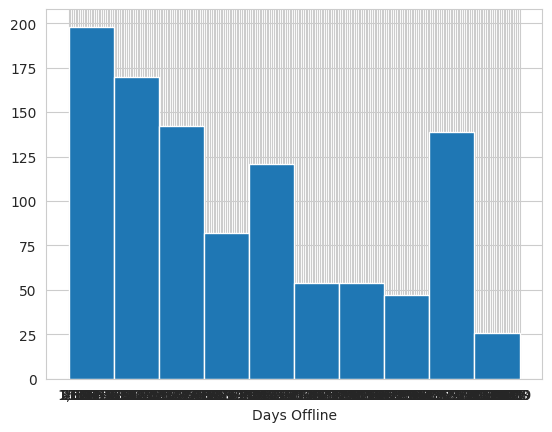

In [ ]:
sns.set_style('whitegrid')
df['Days Offline'].hist(bins=10)
plt.xlabel('Days Offline')

**Create a jointplot showing Area Income versus Age.**

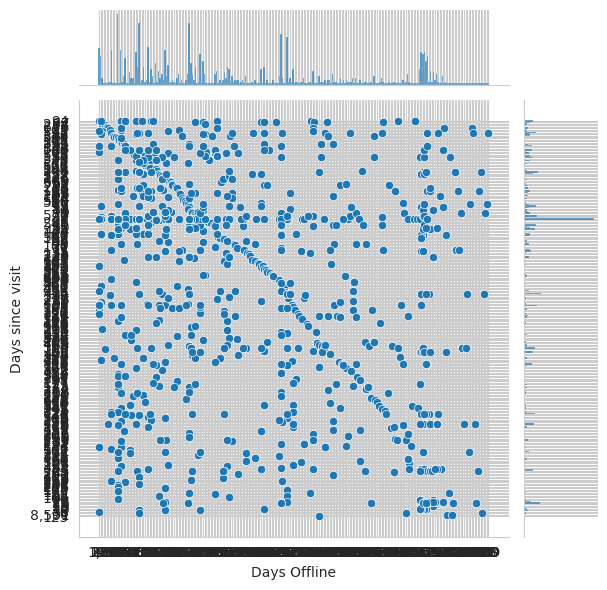

In [ ]:
sns.jointplot(x='Days Offline',y='Days since visit',data=df)

**A jointplot of 'Days since visit' vs 'Days Offline to depict any correlation of the two features'** **bold text**

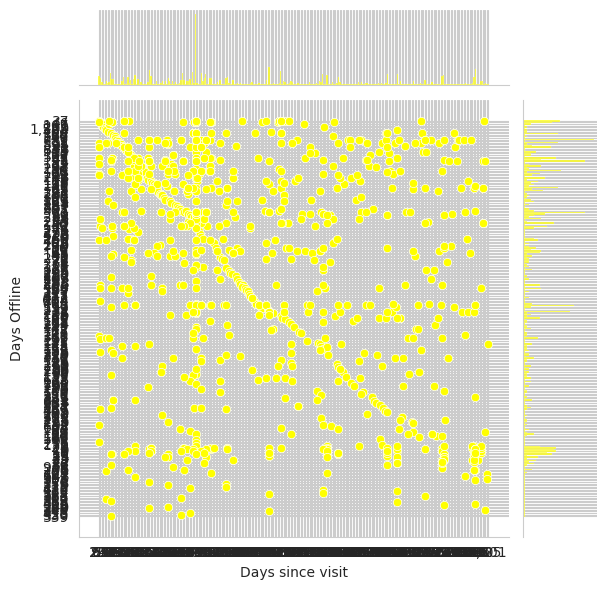

In [ ]:
sns.jointplot(x='Days since visit',y='Days Offline',data=df,color='yellow')

## Feature Engineering

Mathematical formulas work on numerical quantities, and raw data isn't exactly numerical. Feature Engineering is the way of extracting features from data and transforming them into formats that are suitable for Machine Learning algorithms.

It is divided into 3 broad categories:-

**Feature Selection:** All features aren't equal. It is all about selecting a small subset of features from a large pool of features. We select those attributes which best explain the relationship of an independent variable with the target variable. There are certain features which are more important than other features to the accuracy of the model.

**Feature Transformation:** It means transforming our original feature to the functions of original features. Scaling, discretization, binning and filling missing data values are the most common forms of data transformation. To reduce right skewness of the data, we use log.

**Feature Extraction:** When the data to be processed through an algorithm is too large, it’s generally considered redundant. Analysis with a large number of variables uses a lot of computation power and memory, therefore we should reduce the dimensionality of these types of variables. It is a term for constructing combinations of the variables. For tabular data, we use PCA to reduce features. For image, we can use line or edge detection.

We would like to analyse the data and remove all the duplicate values.

In [ ]:
df = df.drop_duplicates()

We’d want to check for any null values in our data, therefore.

In [ ]:
df.isnull().sum()

Date added                   0
SN                           0
Mill                         1
Phone                       20
Region                       0
District                     0
Last order date            311
Days Offline                 1
Last visit                  93
Days since visit             1
RM/CPS                      27
Days Offline (live)          4
Last order date\n(live)    224
Dosifier Status (live)       7
Spoken to Miller           259
Switched ON                285
ONLINE                     290
Issue                      194
Assigned to                355
Status                     284
Any other Comment          702
Category                   168
Order                      795
Unnamed: 23                250
Caller                     101
dtype: int64

We have 37 missing values in our target variable 'ONLINE' out of 522 rows of data. thats more than 10% of the entire dataset. We will drop these rows.

In [ ]:
df = df.drop(df.loc[df['ONLINE'].isnull()].index)
df.isnull().sum()

Date added                   0
SN                           0
Mill                         0
Phone                       15
Region                       0
District                     0
Last order date            235
Days Offline                 1
Last visit                  64
Days since visit             1
RM/CPS                      21
Days Offline (live)          2
Last order date\n(live)    159
Dosifier Status (live)       7
Spoken to Miller            66
Switched ON                  1
ONLINE                       0
Issue                       13
Assigned to                 90
Status                      21
Any other Comment          430
Category                     1
Order                      533
Unnamed: 23                 57
Caller                      45
dtype: int64

## Feature transformation

We will now standardize our quantitative variables and encode our categorical variables to have features that are standard for machine learning.

Drop irrelevant columns.

In [ ]:
df=df[['Days Offline','Days since visit','Switched ON','ONLINE','Days Offline (live)']]
df = df.reset_index()
df.head()

,index,Days Offline,Days since visit,Switched ON,ONLINE,Days Offline (live)
0,0,37,94,No,No,46.0
1,1,46,67,No,No,55.0
2,2,167,234,No,No,176.0
3,3,211,234,No,No,220.0
4,4,167,234,No,No,176.0


from matplotlib import pyplot as plt
_df_0['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Days Offline (live)'].plot(kind='hist', bins=20, title='Days Offline (live)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Days Offline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Days since visit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='level_0', y='index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='Days Offline (live)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['Days Offline (live)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Days Offline')):
  _plot_series(series, series_name, i)
  fig.legend(title='Days Offline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('Days Offline (live)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['level_0']
  ys = series['Days Offline (live)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Days since visit')):
  _plot_series(series, series_name, i)
  fig.legend(title='Days since visit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('Days Offline (live)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Days Offline')):
  _plot_series(series, series_name, i)
  fig.legend(title='Days Offline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['level_0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'level_0'}, axis=1)
              .sort_values('level_0', ascending=True))
  xs = counted['level_0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('level_0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Days since visit')):
  _plot_series(series, series_name, i)
  fig.legend(title='Days since visit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('level_0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Days Offline (live)'].plot(kind='line', figsize=(8, 4), title='Days Offline (live)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Days since visit'].value_counts()
    for x_label, grp in _df_14.groupby('Days Offline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Days Offline')
_ = plt.ylabel('Days since visit')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Days Offline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='level_0', y='Days Offline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Days since visit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='level_0', y='Days since visit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Days Offline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Days Offline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Days since visit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='Days since visit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

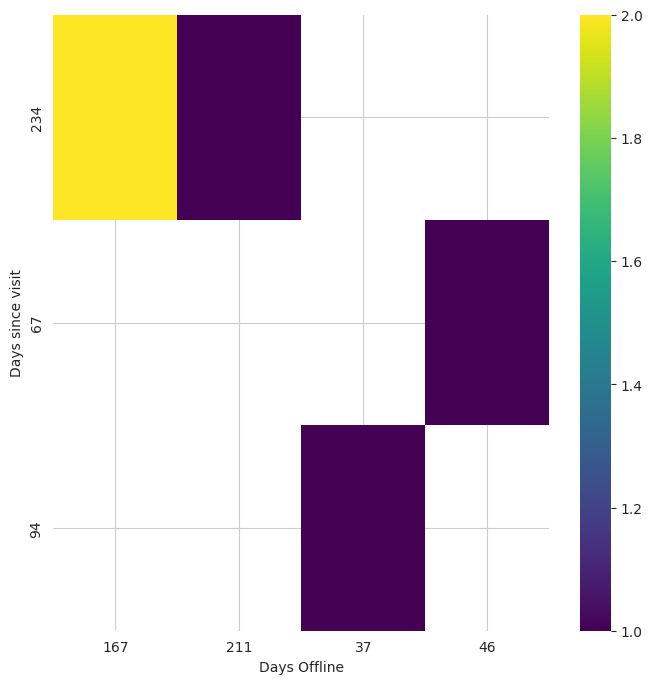

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Days since visit'].value_counts()
    for x_label, grp in _df_14.groupby('Days Offline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Days Offline')
_ = plt.ylabel('Days since visit')

Deal with missing values

In [ ]:
df.isnull().sum()

index                  0
Days Offline           0
Days since visit       0
Switched ON            0
ONLINE                 0
Days Offline (live)    0
dtype: int64

In [ ]:
#deleting rows - missed vales
df.dropna(inplace=True)
print(df.isnull().sum())

index                  0
Days Offline           0
Days since visit       0
Switched ON            0
ONLINE                 0
Days Offline (live)    0
dtype: int64


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['RM_CPS'])
one_hot_encoded_data['Switched ON'] = one_hot_encoded_data['Switched ON'].replace({'No': 0, 'Yes': 1})
one_hot_encoded_data = one_hot_encoded_data.reset_index()
one_hot_encoded_data=one_hot_encoded_data.drop(['level_0','index'],axis=1)
one_hot_encoded_data.head()

KeyError: ignored

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Days Offline', 'Switched ON'])
one_hot_encoded_data['Switched ON'] = one_hot_encoded_data['Switched ON'].replace({'No': 0, 'Yes': 1})
one_hot_encoded_data = one_hot_encoded_data.reset_index()
one_hot_encoded_data=one_hot_encoded_data.drop(['level_0','index'],axis=1)
one_hot_encoded_data.head()

KeyError: ignored

Standardize the data

In [ ]:

from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
# separate the independent and dependent variables
X_data=one_hot_encoded_data.drop(['ONLINE'],axis=1)
target = one_hot_encoded_data.ONLINE

# standardization of dependent variables
scaled_data = scale.fit_transform(X_data)
print(scaled_data)

[[-0.52439182 -0.07641257  0.35687321 ... -0.47170583 -0.34179296
  -0.42111744]
 [-0.53272214 -0.06911301  0.35687321 ... -0.47170583 -0.34179296
   2.37463447]
 [-0.53272214 -0.03991474  0.35687321 ...  2.1199653  -0.34179296
  -0.42111744]
 ...
 [-0.39943704 -0.06728812  0.35687321 ... -0.47170583 -0.34179296
  -0.42111744]
 [-0.39110672 -0.06546322  0.35687321 ... -0.47170583 -0.34179296
  -0.42111744]
 [-0.23283066 -0.08188725 -2.8021156  ... -0.47170583 -0.34179296
  -0.42111744]]


# Logistic Regression

Now it's time to do a train test split, and train our model!

**Split the data into training set and testing set using train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_data
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train

array([[-0.37444608, -0.07458768,  0.35687321, ..., -0.47170583,
        -0.34179296, -0.42111744],
       [-0.34945513, -0.03991474,  0.35687321, ..., -0.47170583,
        -0.34179296, -0.42111744],
       [-0.39943704, -0.06728812,  0.35687321, ..., -0.47170583,
        -0.34179296,  2.37463447],
       ...,
       [-0.3827764 , -0.06363833,  0.35687321, ..., -0.47170583,
        -0.34179296, -0.42111744],
       [-0.23283066, -0.0928366 ,  0.35687321, ...,  2.1199653 ,
        -0.34179296, -0.42111744],
       [-0.49940086, -0.08736193,  0.35687321, ..., -0.47170583,
        -0.34179296, -0.42111744]])

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
**Predict values for the testing data.**

In [ ]:
predictions = logmodel.predict(X_test)

**A classification report for the model.**

This shows the model performance in predicting the online status of the dosifiers

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        16
         Yes       1.00      1.00      1.00       142

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



The model had an accuracy of 100% this shows that with the small data the model performed exceptionally well in classifying the online status of the dosifiers using the features generated from the selected variables **('Days Offline', 'Days since visit', 'RM_CPS', 'Switched ON',
       'Days Offline (live)').**
